# **TRUMP SENTIMENTAL ANALYSIS**

This is python project code to be used for making a dashboard on tableau for sentiments of reddit users on specifically trump.I have retrieved this data using the reddit api. You can use a library named praw(for reddit) but I have used asyncpraw which sets up an asyncrhonous enviornment to retrieve data from reddit.
After cleaning I have used vader and text blob to derive sentiments from text posts

**SETTING UP THE ENVIORNMENT**

In [ ]:

import pandas as pd
import time


In [ ]:
!pip install asyncpraw nest_asyncio

timestamp,
username,
score,
num_comments,
url, These are the attributes I have fetched from the reddit api resulting in around 5000 rows

In [ ]:
import asyncpraw
import pandas as pd
import nest_asyncio
import asyncio

nest_asyncio.apply()  # Required for Jupyter notebooks

keywords = ["Trump", "Trump election", "Trump covid", "Trump 2020", "Donald Trump"]
subreddits = ["politics", "worldnews", "news", "conservative", "democrats"]

results = []

async def scrape_reddit_multiple():
    reddit = asyncpraw.Reddit(
       client_id = "PcbVtiLWquxXygtm71gr4g",
client_secret = "1y4aOr1XDD6Xa8HDxj3bT5wgiZVeuA",
user_agent = "trump by /u/syforce23"
    )

    for kw in keywords:
        for sr in subreddits:
            print(f"🔍 Searching: '{kw}' in r/{sr}")
            subreddit = await reddit.subreddit(sr)
            try:
                async for submission in subreddit.search(kw, sort="top", limit=500):
                    try:
                        # Removed submission.load() as it might not be needed for basic info
                        # Removed submission.comment_sort and comments.replace_more as per the error traceback
                        results.append({
                            "text": submission.title + "\n" + submission.selftext,
                            "timestamp": submission.created_utc,
                            "username": str(submission.author),
                            "subreddit": submission.subreddit.display_name,
                            "score": submission.score,
                            "num_comments": submission.num_comments,
                            "url": submission.url
                        })
                    except Exception as e:
                        print(f"Error processing submission {submission.id}: {e}")
            except Exception as e:
                print(f"Error searching subreddit {sr} for keyword {kw}: {e}")

    await reddit.close()
    print("🔒 Reddit session closed.")

# Run the async function
asyncio.run(scrape_reddit_multiple())

# Convert results to DataFrame
df = pd.DataFrame(results)

# Display the first 10 rows of the DataFrame
display(df.head(10))

🔍 Searching: 'Trump' in r/politics
🔍 Searching: 'Trump' in r/worldnews
🔍 Searching: 'Trump' in r/news
🔍 Searching: 'Trump' in r/conservative
🔍 Searching: 'Trump' in r/democrats
🔍 Searching: 'Trump election' in r/politics
🔍 Searching: 'Trump election' in r/worldnews
🔍 Searching: 'Trump election' in r/news
🔍 Searching: 'Trump election' in r/conservative
🔍 Searching: 'Trump election' in r/democrats
🔍 Searching: 'Trump covid' in r/politics
🔍 Searching: 'Trump covid' in r/worldnews
🔍 Searching: 'Trump covid' in r/news
🔍 Searching: 'Trump covid' in r/conservative
🔍 Searching: 'Trump covid' in r/democrats
🔍 Searching: 'Trump 2020' in r/politics
🔍 Searching: 'Trump 2020' in r/worldnews
🔍 Searching: 'Trump 2020' in r/news
🔍 Searching: 'Trump 2020' in r/conservative
🔍 Searching: 'Trump 2020' in r/democrats
🔍 Searching: 'Donald Trump' in r/politics
🔍 Searching: 'Donald Trump' in r/worldnews
🔍 Searching: 'Donald Trump' in r/news
🔍 Searching: 'Donald Trump' in r/conservative
🔍 Searching: 'Donald Tr

text  \
0  Megathread: Joe Biden Projected to Defeat President Donald Trump and Win the 2020 US Presidential Election\nFormer Vice President Joseph Biden has secured the 270 electoral votes necessary to defeat President Donald Trump and become the 46th President of the United States, according to multiple sources.\n\n---\n\n##Submissions that may interest you\n\nSUBMISSION | DOMAIN\n---|----\n[Biden defeats Trump to win White House, NBC News projects](https://www.nbcnews.com/politics/2020-election/biden-defeats-trump-win-white-house-nbc-news-projects-n1246912) | nbcnews.com\n[US election 2020: Joe Biden projected to beat Donald Trump and become next president](http://news.sky.com/story/us-election-2020-joe-biden-projected-to-beat-donald-trump-and-become-next-president-12123216) | news.sky.com\n[Joe Biden Presidential Election Win Over Trump](https://www.buzzfeednews.com/article/nidhiprakash/biden-won-2020-election-trump-lost?utm_source=dynamic&utm_campaign=bftwbuzzfeed&ref=bftwbuzzfeed) | buzzfeednews.com\n[Joe Biden to become the 46th president of the United States, CNN projects](https://www.cnn.com/2020/11/07/politics/joe-biden-wins-us-presidential-election) | cnn.com\n[Election results live: Biden wins the presidency, defeats Trump](https://www.businessinsider.com/joe-biden-wins-general-election-against-donald-trump-2020-11) | businessinsider.com\n[Joe Biden to become the 46th president of the United States, CNN projects](https://www.cnn.com/2020/11/07/politics/joe-biden-wins-us-presidential-election/index.html) | cnn.com\n[Joe Biden is projected to defeat incumbent Donald Trump in the presidential election](https://www.cnbc.com/2020/11/07/2020-election-winner-biden-final-count-results.html?__source=iosappshare%7Ccom.apple.UIKit.activity.PostToTwitter) | cnbc.com\n[CNN projects Joe Biden has won the 2020 Presidential Race](https://www.cnn.com/election/2020/results/state/pennsylvania/president?iid=politics_election_crm) | cnn.com\n[Joe Biden is projected to defeat incumbent Donald Trump in the presidential election](https://www.cnbc.com/amp/2020/11/07/2020-election-winner-biden-final-count-results.html?__twitter_impression=true) | cnbc.com\n[Democrats Waste No Time Punching Left in the Wake of Biden’s Win](https://theintercept.com/2020/11/06/election-biden-democrats-progressives/) | theintercept.com\n[Biden edges closer to win as Pennsylvania focus intensifies](https://apnews.com/article/Biden-Trump-US-election-2020-results-fd58df73aa677acb74fce2a69adb71f9) | apnews.com\n[How Indigenous voters swung the 2020 election - In Arizona and Wisconsin, Native turnout — which often leans liberal — made the difference in Biden’s slim but winning margin.](https://www.hcn.org/articles/indigenous-affairs-how-indigenous-voters-swung-the-2020-election) | hcn.org\n[Joe Biden elected president of the United States](https://apnews.com/article/election-2020-joe-biden-north-america-national-elections-elections-7200c2d4901d8e47f1302954685a737f) | apnews.com\n[Joe Biden Wins Pennsylvania, Clinching Presidency in Historic Comeback](https://www.nbcphiladelphia.com/news/politics/decision-2020/joe-biden-wins-pennsylvania-clinching-presidency-in-historic-comeback/2581293/) | nbcphiladelphia.com\n[Joe Biden elected president of the United States](https://www.npr.org/2020/11/07/928803493/biden-wins-presidency-according-to-ap-edging-trump-in-turbulent-race?utm_term=nprnews&utm_medium=social&utm_source=twitter.com&utm_campaign=npr) | npr.org\n[Biden wins](https://www.nytimes.com/interactive/2020/11/03/us/elections/results-president.html?action=click&pgtype=Article&state=default&module=styln-elections-2020&region=TOP_BANNER&context=election_recirc) | nytimes.com\n[America Won](https://www.theatlantic.com/ideas/archive/2020/11/joe-biden-wins/616960/) | theatlantic.com\n[US election live results: Joe Biden wins, say US media - latest news](https://www.telegraph.co.uk/news/2020/11/07/us-election-results-2020-live-joe-biden-donald-trump-president/) | telegraph

In [ ]:
import datetime as dt
df['Date'] = df['timestamp'].apply(lambda x: dt.datetime.fromtimestamp(x)) #Convert timestamp to datetime format

In [ ]:
display(df.dtypes)

,0
text,object
timestamp,float64
username,object
subreddit,object
score,int64
num_comments,int64
url,object
Date,datetime64[ns]


In [ ]:
display(df.isnull().sum())

,0
text,0
timestamp,0
username,0
subreddit,0
score,0
num_comments,0
url,0
Date,0


In [ ]:
display(df['subreddit'].value_counts())

,count
subreddit,
politics,1163
Conservative,1127
democrats,1043
worldnews,806
news,564


In [ ]:
display(df['subreddit'].nunique())

5

In [ ]:
tweets_list = df['text'].tolist()
print(len(tweets_list))

4703


In [ ]:
tweets_list_updated = set(tweets_list)
print(len(tweets_list_updated))

3938


In [ ]:
tweets_list_updated  = list(tweets_list_updated)
print(type(tweets_list_updated))

<class 'list'>


In [ ]:
display(df['text'].duplicated().sum())

np.int64(765)

In [ ]:
df = df.drop_duplicates(subset = 'text', keep = 'first',ignore_index = True)
display(df.shape)

(3938, 8)

In [ ]:
display(df['text'].duplicated().sum())

np.int64(0)

In [ ]:
pd.set_option('display.max_colwidth', None)
display(df.head())

text  \
0  Megathread: Joe Biden Projected to Defeat President Donald Trump and Win the 2020 US Presidential Election\nFormer Vice President Joseph Biden has secured the 270 electoral votes necessary to defeat President Donald Trump and become the 46th President of the United States, according to multiple sources.\n\n---\n\n##Submissions that may interest you\n\nSUBMISSION | DOMAIN\n---|----\n[Biden defeats Trump to win White House, NBC News projects](https://www.nbcnews.com/politics/2020-election/biden-defeats-trump-win-white-house-nbc-news-projects-n1246912) | nbcnews.com\n[US election 2020: Joe Biden projected to beat Donald Trump and become next president](http://news.sky.com/story/us-election-2020-joe-biden-projected-to-beat-donald-trump-and-become-next-president-12123216) | news.sky.com\n[Joe Biden Presidential Election Win Over Trump](https://www.buzzfeednews.com/article/nidhiprakash/biden-won-2020-election-trump-lost?utm_source=dynamic&utm_campaign=bftwbuzzfeed&ref=bftwbuzzfeed) | buzzfeednews.com\n[Joe Biden to become the 46th president of the United States, CNN projects](https://www.cnn.com/2020/11/07/politics/joe-biden-wins-us-presidential-election) | cnn.com\n[Election results live: Biden wins the presidency, defeats Trump](https://www.businessinsider.com/joe-biden-wins-general-election-against-donald-trump-2020-11) | businessinsider.com\n[Joe Biden to become the 46th president of the United States, CNN projects](https://www.cnn.com/2020/11/07/politics/joe-biden-wins-us-presidential-election/index.html) | cnn.com\n[Joe Biden is projected to defeat incumbent Donald Trump in the presidential election](https://www.cnbc.com/2020/11/07/2020-election-winner-biden-final-count-results.html?__source=iosappshare%7Ccom.apple.UIKit.activity.PostToTwitter) | cnbc.com\n[CNN projects Joe Biden has won the 2020 Presidential Race](https://www.cnn.com/election/2020/results/state/pennsylvania/president?iid=politics_election_crm) | cnn.com\n[Joe Biden is projected to defeat incumbent Donald Trump in the presidential election](https://www.cnbc.com/amp/2020/11/07/2020-election-winner-biden-final-count-results.html?__twitter_impression=true) | cnbc.com\n[Democrats Waste No Time Punching Left in the Wake of Biden’s Win](https://theintercept.com/2020/11/06/election-biden-democrats-progressives/) | theintercept.com\n[Biden edges closer to win as Pennsylvania focus intensifies](https://apnews.com/article/Biden-Trump-US-election-2020-results-fd58df73aa677acb74fce2a69adb71f9) | apnews.com\n[How Indigenous voters swung the 2020 election - In Arizona and Wisconsin, Native turnout — which often leans liberal — made the difference in Biden’s slim but winning margin.](https://www.hcn.org/articles/indigenous-affairs-how-indigenous-voters-swung-the-2020-election) | hcn.org\n[Joe Biden elected president of the United States](https://apnews.com/article/election-2020-joe-biden-north-america-national-elections-elections-7200c2d4901d8e47f1302954685a737f) | apnews.com\n[Joe Biden Wins Pennsylvania, Clinching Presidency in Historic Comeback](https://www.nbcphiladelphia.com/news/politics/decision-2020/joe-biden-wins-pennsylvania-clinching-presidency-in-historic-comeback/2581293/) | nbcphiladelphia.com\n[Joe Biden elected president of the United States](https://www.npr.org/2020/11/07/928803493/biden-wins-presidency-according-to-ap-edging-trump-in-turbulent-race?utm_term=nprnews&utm_medium=social&utm_source=twitter.com&utm_campaign=npr) | npr.org\n[Biden wins](https://www.nytimes.com/interactive/2020/11/03/us/elections/results-president.html?action=click&pgtype=Article&state=default&module=styln-elections-2020&region=TOP_BANNER&context=election_recirc) | nytimes.com\n[America Won](https://www.theatlantic.com/ideas/archive/2020/11/joe-biden-wins/616960/) | theatlantic.com\n[US election live results: Joe Biden wins, say US media - latest news](https://www.telegraph.co.uk/news/2020/11/07/us-election-results-2020-live-joe-biden-donald-trump-president/) | telegraph

**Data Cleaning**

In [ ]:
import re

def remove_emoji(text):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['Processed_text'] = df['text'].apply(remove_emoji)

df['Processed_text'] = df['text'].str.split(r'\n')

# Step 4: Explode into multiple rows (duplicating other column values)
df = df.explode('Processed_text')

# Step 5: Strip whitespace and drop empty rows
df['Processed_text'] = df['Processed_text'].str.strip()
df = df[df['Processed_text'] != '']

# Step 6: (Optional) Reset index if needed
df = df.reset_index(drop=True)

# Display the cleaned DataFrame


0                                                                                              Megathread: Joe Biden Projected to Defeat President Donald Trump and Win the 2020 US Presidential Election
1    Former Vice President Joseph Biden has secured the 270 electoral votes necessary to defeat President Donald Trump and become the 46th President of the United States, according to multiple sources.
2                                                                                                                                                                                                     ---
3                                                                                                                                                                     ##Submissions that may interest you
4                                                                                                                                                                                     SUBMISSION

In [ ]:
print(df['Processed_text'].head(20))

0                                                                                                                                                                                    Megathread: Joe Biden Projected to Defeat President Donald Trump and Win the 2020 US Presidential Election
1                                                                                          Former Vice President Joseph Biden has secured the 270 electoral votes necessary to defeat President Donald Trump and become the 46th President of the United States, according to multiple sources.
2                                                                                                                                                                                                                                                                                           ---
3                                                                                                                                       

In [ ]:
initial_shape = df.shape
df = df[~df['Processed_text'].str.startswith('RT', na=False)]
removed_count = initial_shape[0] - df.shape[0]
print(f"Number of rows removed starting with 'RT': {removed_count}")

Number of rows removed starting with 'RT': 0


In [ ]:
display(df.shape)

(1599670, 9)

In [ ]:
display(df['Processed_text'].head())

,Processed_text
0,Megathread: Joe Biden Projected to Defeat President Donald Trump and Win the 2020 US Presidential Election
1,"Former Vice President Joseph Biden has secured the 270 electoral votes necessary to defeat President Donald Trump and become the 46th President of the United States, according to multiple sources."
2,---
3,##Submissions that may interest you
4,SUBMISSION | DOMAIN


In [ ]:
df['Processed_text'] = df['Processed_text'].str.replace(r'https?://\S+|www\.\S+', '', regex=True)  # Remove standard URLs
df['Processed_text'] = df['Processed_text'].str.replace(r'\b\S+\.(com|org|net|gov|edu|co\.uk|us)\b', '', regex=True)  # Remove domain names
df['Processed_text'] = df['Processed_text'].str.replace("[^a-zA-Z\s]", " ", regex=True)  # Remove special characters/numbers
df['Processed_text'] = df['Processed_text'].str.lower()  # Convert to lowercase
df['Processed_text'] = df['Processed_text'].str.replace(r'\bamp\b', '', regex=True)  # Remove 'amp' if it stands alone
df['Processed_text'] = df['Processed_text'].str.replace(r'\s+', ' ', regex=True).str.strip()  # Normalize whitespace

In [ ]:
display(df['Processed_text'].head(25))

,Processed_text
0,megathread joe biden projected to defeat president donald trump and win the us presidential election
1,former vice president joseph biden has secured the electoral votes necessary to defeat president donald trump and become the th president of the united states according to multiple sources
2,
3,submissions that may interest you
4,submission domain
5,
6,biden defeats trump to win white house nbc news projects
7,us election joe biden projected to beat donald trump and become next president
8,joe biden presidential election win over trump
9,joe biden to become the th president of the united states cnn projects


In [ ]:
df = df.sample(n=10000, random_state=42)  # random_state ensures reproducibility

# Optional: Reset index after sampling
df= df.reset_index(drop=True)

# Preview the sampled data
print(df.head())

In [ ]:
df.to_csv('f.csv', index=False)

KeyboardInterrupt: 

**Creating Sentiments**

In [ ]:
from textblob import TextBlob

pol = []
for text in df['Processed_text']:
    blob = TextBlob(text)
    pol.append(blob.sentiment.polarity)

# Add polarity scores to DataFrame
df['TextBlob_Polarity'] = pol

# Calculate and print sentiment counts from TextBlob
positive = 0
negative = 0
neutral = 0
for i in pol:
    if i > 0:
        positive += 1
    elif i < 0:
        negative += 1
    else:
        neutral += 1

print("TextBlob Sentiment Analysis:")
print("Positive:", positive)
print("Negative:", negative)
print("Neutral:", neutral)

TextBlob Sentiment Analysis:
Positive: 2702
Negative: 1430
Neutral: 5868


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
sentiment_scores = []
for text in df['Processed_text']:
    sentiment_scores.append(sid.polarity_scores(text))

# Add VADER sentiment scores to DataFrame
vader_scores_df = pd.DataFrame(sentiment_scores)
df = pd.concat([df, vader_scores_df], axis=1)

# Display the first few rows with new sentiment scores
display(df.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

**Data Visualisation**

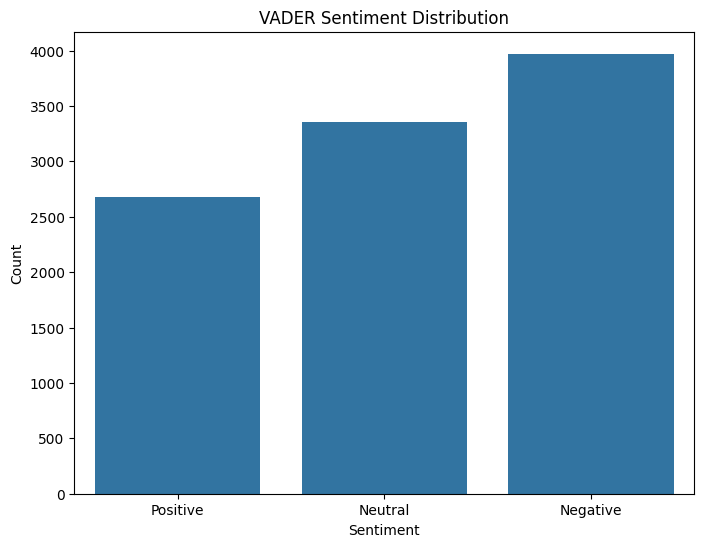

In [ ]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Categorize sentiment based on Compound score
df['VADER_Sentiment'] = df['compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))

# Get sentiment counts
vader_sent_count = pd.DataFrame.from_dict(Counter(df['VADER_Sentiment']), orient = 'index').reset_index()
vader_sent_count.columns = ['sentiment', 'count']

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(y="count", x='sentiment', data=vader_sent_count)
plt.title('VADER Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
neutral_sentiment_df = df[df['VADER_Sentiment'] == 'Neutral']
display(neutral_sentiment_df)

text  \
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
df = df.drop(columns=['username', 'url', 'TextBlob_Polarity'])
display(df.head())

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
positive_sentiment_df = df[df['VADER_Sentiment'] == 'Positive']
display(positive_sentiment_df)

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
import pandas as pd

# Set display options to show full text content
pd.set_option('display.max_colwidth', None)

# Display the positive sentiment DataFrame again to see the full text
display(df.shape)

(10000, 12)

In [ ]:
df.head()

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
df = df.drop(columns=[df.columns[0]])
display(df.head())

NameError: name 'df' is not defined

**Final CSV File**

In [ ]:
df.to_csv('final_trump_compressed.csv', index=False)